# Import Libraries and Set Up Data

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Set up synthetic insurance data
num_policies = 1000
np.random.seed(42)

# Generate sample insurance policy data
data = {
    'Policy ID': range(1, num_policies + 1),
    'Inception Date': pd.date_range(start='2023-01-01', periods=num_policies, freq='D'),
    'Coverage Period (Years)': np.random.randint(1, 20, num_policies),
    'Annual Premium (CU)': np.random.randint(500, 5000, num_policies),
    'Expected Annual Claims (CU)': np.random.randint(200, 3000, num_policies),
    'Discount Rate (%)': np.random.uniform(3, 5, num_policies),
    'Risk Adjustment (CU)': np.random.uniform(10, 100, num_policies),
    'Directly Attributable Expenses (CU)': np.random.uniform(100, 500, num_policies), # e.g., acquisition cost
    'Non-Attributable Expenses (CU)': np.random.uniform(50, 200, num_policies)       # e.g., general overhead
}

df = pd.DataFrame(data)
df['Discount Rate'] = df['Discount Rate (%)'] / 100
df.head()

,Policy ID,Inception Date,Coverage Period (Years),Annual Premium (CU),Expected Annual Claims (CU),Discount Rate (%),Risk Adjustment (CU),Directly Attributable Expenses (CU),Non-Attributable Expenses (CU),Discount Rate
0,1,2023-01-01,7,1981,828,3.249642,53.964607,337.512253,164.936821,0.032496
1,2,2023-01-02,15,2401,2757,4.588421,46.169848,330.237371,95.614195,0.045884
2,3,2023-01-03,11,3951,1931,3.551535,23.832194,164.583134,171.744052,0.035515
3,4,2023-01-04,8,4564,745,4.754181,61.534651,288.695935,94.087514,0.047542
4,5,2023-01-05,7,554,1787,4.888084,34.931127,321.388710,116.948954,0.048881


# Calculate Fulfillment Cash Flows

In [ ]:
# Calculate the present value of future cash flows
def calculate_present_value(cash_flow, discount_rate, periods):
    return cash_flow / ((1 + discount_rate) ** periods)

In [ ]:
# Present value of premiums and claims
df['Present Value of Premiums'] = df.apply(lambda x: calculate_present_value(
    x['Annual Premium (CU)'] * x['Coverage Period (Years)'],
    x['Discount Rate'], x['Coverage Period (Years)']), axis=1)

df['Present Value of Claims'] = df.apply(lambda x: calculate_present_value(
    x['Expected Annual Claims (CU)'] * x['Coverage Period (Years)'],
    x['Discount Rate'], x['Coverage Period (Years)']), axis=1)

# Present value of directly attributable expenses
df['Present Value of Directly Attributable Expenses'] = df.apply(lambda x: calculate_present_value(
    x['Directly Attributable Expenses (CU)'] * x['Coverage Period (Years)'],
    x['Discount Rate'], x['Coverage Period (Years)']), axis=1)

# Adjust CSM with Allocated Expenses

In [ ]:
# Adjust CSM to include directly attributable expenses
df['CSM'] = df['Present Value of Premiums'] - df['Present Value of Claims'] - df['Risk Adjustment (CU)'] - df['Present Value of Directly Attributable Expenses']

In [ ]:
# Simplified risk adjustment calculation
df['Adjusted Risk'] = df['Risk Adjustment (CU)'] * df['Coverage Period (Years)']

# Calculate Contractual Service Margin (CSM)

# Calculate Risk Adjustment

In [ ]:
# CSM - initial unearned profit example
df['CSM'] = df['Present Value of Premiums'] - df['Present Value of Claims'] - df['Adjusted Risk']

# Calculate Liability

In [ ]:
# Total liability = present value of cash flows + risk adjustment + CSM
df['Total Liability'] = df['Present Value of Claims'] + df['Adjusted Risk'] + df['CSM']

# Financial Reporting and Visualization

Present Value of Premiums    1.729498e+06
Present Value of Claims      9.053541e+05
CSM                          7.695957e+05
Total Liability              1.729498e+06
dtype: float64


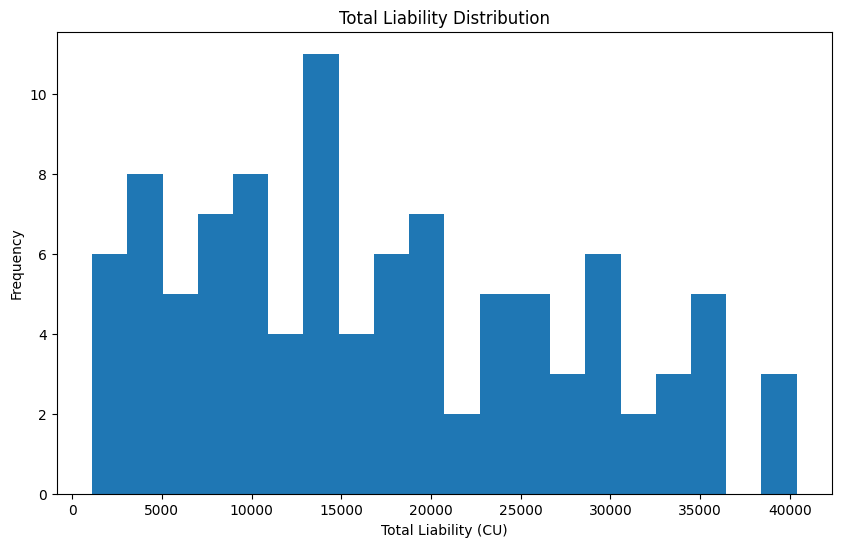

In [ ]:
# Summarize the total liability, revenue, etc., for reporting
summary = df[['Present Value of Premiums', 'Present Value of Claims', 'CSM', 'Total Liability']].sum()
print(summary)

# Visualize total liability distribution
plt.figure(figsize=(10, 6))
plt.hist(df['Total Liability'], bins=20)
plt.title('Total Liability Distribution')
plt.xlabel('Total Liability (CU)')
plt.ylabel('Frequency')
plt.show()